<font face = "Verdana" size = "4"> <b> WEB SCRAPING – ASSIGNMENT 2

<font face = "Verdana" size = "3"> Q1: Write a python program to scrape data for “Data Analyst” Job position in “Bangalore” location. You have to scrape the job-title, job-location, company_name, experience_required. You have to scrape first 10 jobs data.<br>

<font face = "Verdana" size = "3">1. First get the webpage https://www.naukri.com/<br>
<font face = "Verdana" size = "3">2. Enter “Data Analyst” in “Skill, Designations, Companies” field and enter “Bangalore” in “enter the<br>
<font face = "Verdana" size = "3">location” field.<br>
<font face = "Verdana" size = "3">3. Then click the search button.<br>
<font face = "Verdana" size = "3">4. Then scrape the data for the first 10 jobs results you get.<br>
<font face = "Verdana" size = "3">5. Finally create a dataframe of the scraped data.<br>
<font face = "Verdana" size = "3">Note: All of the above steps have to be done in code. No step is to be done manually.<br>
  

In [1]:
# Let's first install selenium Library
!pip install selenium

In [2]:
# Let's import all required Libraries
import selenium #library that is used to work with selenium
from selenium import webdriver #importing webdriver module from selenium to open automated chrome window
import pandas as pd #to create DataFrame
from selenium.webdriver.common.by import By #importing inbuilt class By
import warnings #to ignore any sort of warning
warnings.filterwarnings ("ignore")
import time #use to stop search engine for few seconds

In [24]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")

In [25]:
#Let's maximize the automated chrome window
driver.maximize_window()

In [26]:
#Opening up naukri.com website on automated chrome window
url = 'https://www.naukri.com/'
driver.get(url)



In [27]:
 # finding web element for search job bar
search_job = driver.find_element(By.CLASS_NAME, "suggestor-input")
search_job.send_keys ("Data Analyst")

# finding web element for search Locn bar using absolute xpath
search_locn = driver.find_element(By.XPATH,'/html/body/div[1]/div[6]/div/div/div[5]/div/div/div[1]/input')
search_locn.send_keys ("Bangalore") 

# clicking using absolute xpath function
search_btn = driver.find_element(By.CLASS_NAME, "qsbSubmit")
search_btn.click()

In [21]:
# Let's extract all web elements having job titles
job_titles = []
title_tags =driver.find_elements(By.XPATH, "//a[@class='title fw500 ellipsis']")
for i in range(0,10):
    job_titles.append(title_tags[i].text)
job_titles
len (job_titles)
(job_titles)

['Senior/Lead - data Analyst',
 'Reference Data Analyst',
 'Data Analyst/Data Scientist- Automotive Domain',
 'Job || Data Analyst || Tech Mahindra',
 'Sr. Data Analyst',
 'Senior Data Management Analyst',
 'Senior Analyst - Data Management',
 'Data Analyst - Python/Artificial Intelligence',
 'Data Analyst / Sr Data Analyst - FIntech',
 'Senior Data Analyst']

In [30]:
# Let's extract all web elements having company names
Company_Name = []
company_tags = driver.find_elements (By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
Company_Name=[]
for i in range(0,10):
    Company_Name.append(company_tags[i].text)
Company_Name

['Movate Technologies',
 'Deutsche Bank',
 'Verolt Engineering',
 'Tech Mahindra',
 'Ugam',
 'Wells Fargo',
 'Accenture',
 'iMindYourBusiness',
 'Connexions',
 'Krezig Consultants LLP']

In [33]:
 # Let's extract all web elements having experience using parent tag
Experience = []
Experience_tag=driver.find_elements (By.XPATH, '//li[@class="fleft grey-text br2 placeHolderLi experience"]')
Experience=[]
for i in range(0,10):
    Experience.append(Experience_tag[i].text)
Experience

['5-10 Yrs',
 '0-6 Yrs',
 '3-6 Yrs',
 '5-10 Yrs',
 '4-8 Yrs',
 '8-9 Yrs',
 '5-8 Yrs',
 '0-2 Yrs',
 '1-4 Yrs',
 '2-7 Yrs']

In [40]:
location = []

locn_tags= driver.find_elements (By.XPATH, '//li[@class="fleft grey-text br2 placeHolderLi location"]')
for i in range(0,10):
    location.append(locn_tags[i].text)
len(location)
location

['Bangalore/Bengaluru, Hyderabad/Secunderabad, Chennai',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru, Hyderabad/Secunderabad, Pune',
 'Temp. WFH - Bangalore/Bengaluru, Kolkata, Hyderabad/Secunderabad, Pune, Chennai, Delhi / NCR, Mumbai (All Areas)',
 'Bangalore/Bengaluru, Pune, Mumbai (All Areas)',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru, Kolkata, Mumbai, Hyderabad/Secunderabad, Pune, Chennai',
 'Bangalore/Bengaluru',
 'Bangalore/Bengaluru']

In [41]:
len (job_titles), len(company_names), len(experience), len(location)

(10, 0, 20, 10)

In [43]:
jobs = pd.DataFrame()
jobs ['Job Title'] = job_titles
jobs ['Company'] = Company_Name
jobs ['Experience'] = Experience
jobs['Location'] = location
jobs.head(11)

,Job Title,Company,Experience,Location
0,Senior/Lead - data Analyst,Movate Technologies,5-10 Yrs,"Bangalore/Bengaluru, Hyderabad/Secunderabad, C..."
1,Reference Data Analyst,Deutsche Bank,0-6 Yrs,Bangalore/Bengaluru
2,Data Analyst/Data Scientist- Automotive Domain,Verolt Engineering,3-6 Yrs,"Bangalore/Bengaluru, Hyderabad/Secunderabad, Pune"
3,Job || Data Analyst || Tech Mahindra,Tech Mahindra,5-10 Yrs,"Temp. WFH - Bangalore/Bengaluru, Kolkata, Hyde..."
4,Sr. Data Analyst,Ugam,4-8 Yrs,"Bangalore/Bengaluru, Pune, Mumbai (All Areas)"
5,Senior Data Management Analyst,Wells Fargo,8-9 Yrs,Bangalore/Bengaluru
6,Senior Analyst - Data Management,Accenture,5-8 Yrs,Bangalore/Bengaluru
7,Data Analyst - Python/Artificial Intelligence,iMindYourBusiness,0-2 Yrs,"Bangalore/Bengaluru, Kolkata, Mumbai, Hyderaba..."
8,Data Analyst / Sr Data Analyst - FIntech,Connexions,1-4 Yrs,Bangalore/Bengaluru
9,Senior Data Analyst,Krezig Consultants LLP,2-7 Yrs,Bangalore/Bengaluru


<font face = "Verdana" size = "3">Q2: Write a python program to scrape data for “Data Scientist” Job position in “Bangalore” location. You
have to scrape the job-title, job-location, company_name. You have to scrape first 10 jobs data. This task will be done in following steps:

In [47]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")

In [48]:
#Let's maximize the automated chrome window
driver.maximize_window()

In [49]:
#Opening up naukri.com website on automated chrome window
url = 'https://www.naukri.com/'
driver.get(url)

In [50]:
 # finding web element for search job bar
search_job = driver.find_element(By.CLASS_NAME, "suggestor-input")
search_job.send_keys ("Data Scientist")

In [51]:
# finding web element for search Locn bar using absolute xpath
search_locn = driver.find_element(By.XPATH,'/html/body/div[1]/div[6]/div/div/div[5]/div/div/div[1]/input')
search_locn.send_keys ("Delhi") 

In [52]:
# clicking using absolute xpath function
search_btn = driver.find_element(By.CLASS_NAME, "qsbSubmit")
search_btn.click()

In [53]:
# Let's extract all web elements having job titles
job_titles = []
title_tags =driver.find_elements(By.XPATH, "//a[@class='title fw500 ellipsis']")
for i in range(0,10):
    job_titles.append(title_tags[i].text)
len (job_titles)
(job_titles)

['Data Scientist',
 'Data Scientist',
 'Senior Data Scientist',
 'Data Scientist - Noida/Bangalore',
 'Data Scientist',
 'DigitalBCG GAMMA Data Scientist',
 'AVAP Agile Information Systems - Data Scientist - Machine Learning',
 'Data Scientist- Bangalore/ Pune Hybrid',
 'Data Scientist',
 'Data Scientist']

In [54]:
# Let's extract all web elements having company names
company_names = []
company_tags = driver.find_elements (By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in range(0,10):
    company_names.append(company_tags[i].text)
company_names

['Tata Nexarc',
 'Mindtree',
 'Boston Consulting Group',
 'EXL',
 'HCLTech',
 'Boston Consulting Group',
 'AVAP Agile',
 'Team Plus Staffing Solution Pvt Ltd',
 'ACS Solutions',
 'ACS Solutions']

In [55]:
 # Let's extract all web elements having experience using parent tag
experience = []
exp_tags=driver.find_elements (By.XPATH, '//li[@class="fleft grey-text br2 placeHolderLi experience"]')
for i in range(0,10):
    experience.append(exp_tags[i].text)
len(experience)
experience

['4-8 Yrs',
 '5-10 Yrs',
 '5-10 Yrs',
 '5-10 Yrs',
 '4-9 Yrs',
 '2-5 Yrs',
 '3-8 Yrs',
 '3-8 Yrs',
 '4-8 Yrs',
 '4-8 Yrs']

In [56]:
location = [] 

locn_tags= driver.find_elements (By.XPATH, '//li[@class="fleft grey-text br2 placeHolderLi location"]')
for i in range(0,10):
    location.append(locn_tags[i].text)
len(location)

10

In [57]:
jobs = pd.DataFrame()
jobs ['Job Title'] = job_titles
jobs ['Company'] = company_names
jobs ['Experience'] = experience
jobs['Location'] = location
jobs.head(10)

,Job Title,Company,Experience,Location
0,Data Scientist,Tata Nexarc,4-8 Yrs,"New Delhi, Hyderabad/Secunderabad, Pune, Ahmed..."
1,Data Scientist,Mindtree,5-10 Yrs,"Hybrid - Noida, Kolkata, Hyderabad/Secunderaba..."
2,Senior Data Scientist,Boston Consulting Group,5-10 Yrs,"New Delhi, Mumbai, Chennai, Bangalore/Bengaluru"
3,Data Scientist - Noida/Bangalore,EXL,5-10 Yrs,"Noida, Bangalore/Bengaluru"
4,Data Scientist,HCLTech,4-9 Yrs,"Noida, Hyderabad/Secunderabad, Chennai, Bangal..."
5,DigitalBCG GAMMA Data Scientist,Boston Consulting Group,2-5 Yrs,"New Delhi, Bangalore/Bengaluru"
6,AVAP Agile Information Systems - Data Scientis...,AVAP Agile,3-8 Yrs,"Delhi / NCR, Kolkata, Mumbai, Hyderabad/Secund..."
7,Data Scientist- Bangalore/ Pune Hybrid,Team Plus Staffing Solution Pvt Ltd,3-8 Yrs,"Delhi / NCR, Pune, Bangalore/Bengaluru"
8,Data Scientist,ACS Solutions,4-8 Yrs,"Noida, Hyderabad/Secunderabad, Pune, Chennai, ..."
9,Data Scientist,ACS Solutions,4-8 Yrs,"Noida, Hyderabad/Secunderabad, Pune, Chennai, ..."


<font face = "Verdana" size = "3"> Q3: In this question you have to scrape data using the filters available on the webpage as shown below:<br>
<br>You have to use the location and salary filter.
<br>You have to scrape data for “Data Scientist” designation for first 10 job results. You have to scrape the job-title, <br>job-location, company name, experience required.
<br>The location filter to be used is “Delhi/NCR”. The salary filter to be used is “3-6” lakhs
    
    The task will be done as shown in the below steps:
1. first get the webpage https://www.naukri.com/
2. Enter “Data Scientist” in “Skill, Designations, and Companies” field.
3. Then click the search button.
4. Then apply the location filter and salary filter by checking the respective boxes
5. Then scrape the data for the first 10 jobs results you get.
6. Finally create a dataframe of the scraped data.
Note: All of the above steps have to be done in code. No

In [78]:
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")
#Opening up naukri.com website on automated chrome window
url = 'https://www.naukri.com/'
driver.get(url)
# finding web element for search job bar
search_job = driver.find_element(By.CLASS_NAME, "suggestor-input")
search_job.send_keys ("Data Scientist") #Enter “Data Scientist” in “Skill, Designations, and Companies” field

In [79]:
# clicking using absolute xpath function
search_btn = driver.find_element(By.CLASS_NAME, "qsbSubmit")
search_btn.click() #Then click the search button.

In [81]:
locn_tags= driver.find_element(By.XPATH,'//span[@class="ellipsis fleft" and @title="Delhi / NCR" ]')
locn_tags.click() #Then apply the location filter and salary filter by checking the respective boxes

In [82]:
# Let's extract all web elements having job titles
job_titles = []
title_tags =driver.find_elements(By.XPATH, "//a[@class='title fw500 ellipsis']")
for i in range(0,10):
    job_titles.append(title_tags[i].text)
len (job_titles)
(job_titles)
# Let's extract all web elements having company names
company_names = []
company_tags = driver.find_elements (By.XPATH,'//a[@class="subTitle ellipsis fleft"]')
for i in range(0,10):
    company_names.append(company_tags[i].text)
company_names
 # Let's extract all web elements having experience using parent tag
experience = []
exp_tags=driver.find_elements (By.XPATH, '//li[@class="fleft grey-text br2 placeHolderLi experience"]')
for i in range(0,10):
    experience.append(exp_tags[i].text)
len(experience)
experience
location = [] 
#Finally create a dataframe of the scraped data. Note: All of the above steps have to be done in code. No
jobs = pd.DataFrame()
jobs ['Job Title'] = job_titles
jobs ['Company'] = company_names
jobs ['Experience'] = experience

jobs.head(10)

,Job Title,Company,Experience
0,Data Scientist,Tata Nexarc,4-8 Yrs
1,Data Scientist,Mindtree,5-10 Yrs
2,Senior Data Scientist,Boston Consulting Group,5-10 Yrs
3,Data Scientist - Noida/Bangalore,EXL,5-10 Yrs
4,Data Scientist,HCLTech,4-9 Yrs
5,DigitalBCG GAMMA Data Scientist,Boston Consulting Group,2-5 Yrs
6,AVAP Agile Information Systems - Data Scientis...,AVAP Agile,3-8 Yrs
7,Data Scientist- Bangalore/ Pune Hybrid,Team Plus Staffing Solution Pvt Ltd,3-8 Yrs
8,Data Scientist,ACS Solutions,4-8 Yrs
9,Data Scientist,ACS Solutions,4-8 Yrs


<font face = "Verdana" size = "3">Q4: Scrape data of first 100 sunglasses listings on flipkart.com. You have to scrape four attributes:
1. Brand
2. Product Description
3. Price
The attributes which you have to scrape is ticked marked in the below image.
To scrape
    
    To scrape the data you have to go through following steps:
1. Go to Flipkart webpage by url : https://www.flipkart.com/
2. Enter “sunglasses” in the search field where “search for products, brands and more” is written and
click the search icon
3. After that you will reach to the page having a lot of sunglasses. From this page you can scrap the required data as usual.
4. After scraping data from the first page, go to the “Next” Button at the bottom other page , then click on it.
5. Now scrape data from this page as usual
6. Repeat this until you get data for 100 sunglasses.

In [123]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")
#Go to Flipkart webpage by url : https://www.flipkart.com/
url='https://www.flipkart.com/'
driver.get(url)

In [124]:
 # finding web element for search job bar
search_bar=driver.find_element(By.XPATH,'//input[@class="_3704LK"]')
search_bar

<selenium.webdriver.remote.webelement.WebElement (session="dccf0838ee4c12fe6024530e195adf12", element="d62e06f8-aac1-4ac1-a11d-f9ec0a1496c9")>

In [125]:
search_btn=driver.find_element(By.XPATH,'//button[@class="L0Z3Pu"]')
search_btn 

<selenium.webdriver.remote.webelement.WebElement (session="dccf0838ee4c12fe6024530e195adf12", element="4a2427f8-e4f9-417c-8c5a-5970742cb5fc")>

In [126]:
search_bar.send_keys ('sunglasses') # Enter “sunglasses” in the search field 
search_bar.click()

In [127]:
search_btn.click()

In [134]:
# Let's extract all Brand name
Brand = []
title_tags =driver.find_elements(By.XPATH, '//div[@class="_2WkVRV"]')
for i in title_tags:
    Brand.append(i.text)

In [136]:
# Let's extract all Product Description
PD = []
Dis =driver.find_elements(By.XPATH, '//a[@class="IRpwTa"]')
for i in Dis:
    PD.append(i.text)

In [139]:
# Let's extract Price 
rupees = []
paisa =driver.find_elements(By.XPATH, '//div[@class="_30jeq3"]')
for i in paisa:
    rupees.append(i.text)

In [177]:
# to scrap data from next page
Brand = []
PD = []
rupees = []
start=0
end=2
for page in range (start, end) :
    title_tags =driver.find_elements(By.XPATH, '//div[@class="_2WkVRV"]')
    for i in title_tags:
        Brand.append(i.text)
    Dis =driver.find_elements(By.XPATH, '//a[@class="IRpwTa"]')
    for i in Dis:
        PD.append(i.text)
    paisa =driver.find_elements(By.XPATH, '//div[@class="_30jeq3"]')
    for i in paisa:
        rupees.append(i.text)
    driver.find_element(By.XPATH,'//*[@id="container"]/div/div[3]/div[1]/div[2]/div[12]/div/div/nav/a[12]').click() # go to the “Next” Button
    time.sleep(10)
   

In [185]:
df = pd.DataFrame()
df['Brand'] = Brand
df['PD'] = PD
df['rupees'] = rupees
df.head(100)


,Brand,PD,rupees
0,CRYSTAL CART,"Polarized, UV Protection, Mirrored, Gradient R...",₹459
1,EYELLUSION,"UV Protection, Polarized, Riding Glasses, Nigh...",₹201
2,METRONAUT,"UV Protection, Gradient Sunglass",₹254
3,GANSTA,"Riding Glasses, UV Protection Aviator Sunglass...",₹293
4,Ray-Ban,UV Protection Aviator Sunglasses (62),"₹7,509"
...,...,...,...
75,Zyaden,"UV Protection, Gradient Wayfarer Sunglasses (F...",₹284
76,Fair-x,"Mirrored, Riding Glasses, UV Protection Sports...",₹363
77,ROYAL SON,"Polarized, UV Protection Aviator Sunglasses (58)",₹711
78,Singco India,"Mirrored, Riding Glasses, Others Sports Sungla...",₹205


<font face = "Verdana" size = "3">Q5: Scrape 100 reviews data from flipkart.com for iphone11 phone. You have to go the link: https://www.flipkart.com/apple-iphone-11-black-64-gb-includes-earpods-power-adapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKCTSVZAXUHGREPBFGI&marketplace.
When you will open the above link you will reach to the below shown webpage
As shown in the above page you have to scrape the tick marked attributes.These are:
1. Rating
2. Review summary
3. Full review
4. You have to scrape this data for first 100 reviews

In [186]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")
#Go to Flipkart webpage by url : https://www.flipkart.com/
url='https://www.flipkart.com/apple-iphone-11-black-64-gb-includes- earpods-power- adapter/p/itm0f37c2240b217?pid=MOBFKCTSVZAXUHGR&lid=LSTMOBFKC TSVZAXUHGREPBFGI&marketplace.'
driver.get(url)

provided Link for Q5 is not working 

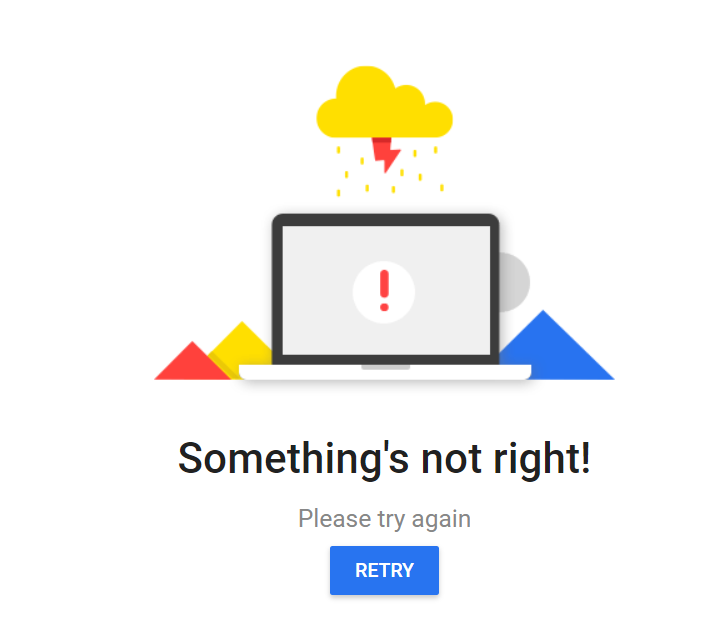

<font face = "Verdana" size = "3"> Q7: Go to the link - https://www.myntra.com/shoes
Set second Price filter and Color filter to “Black”, as shown in the below image. And then scrape First 100 shoes data you get. The data should include “Brand” of the shoes , Short Shoe description, price of the shoe as shown in the below image.

In [296]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")
#Go to myntra webpage by url 
url='https://www.myntra.com/shoes'
driver.get(url)

In [297]:
spf=driver.find_element (By.XPATH, '//span[@class="colour-label colour-colorDisplay"]')


In [298]:
spf.click()

In [299]:
st = driver.find_element(By.XPATH, '/html/body/div[2]/div/main/div[3]/div[1]/section/div/div[5]/ul/li[2]/label/div')


In [300]:
st.click()

In [310]:
Brand = []
PD = []
rupees = []
start=0
end=2
for page in range (start, end) :
    title_tags =driver.find_elements(By.XPATH, '//h3[@class="product-brand"]')
    for i in title_tags:
        Brand.append(i.text)
    Dis =driver.find_elements(By.XPATH, '//h4[@class="product-product"]')
    for i in Dis:
        PD.append(i.text)
    paisa =driver.find_elements(By.XPATH, '//div[@class="product-price"]')
    for i in paisa:
        rupees.append(i.text)
    driver.find_element(By.XPATH,'//*[@id="desktopSearchResults"]/div[2]/section/div[2]/ul/li[12]/a').click() # go to the “Next” Button
    time.sleep(10)

In [311]:
df = pd.DataFrame()
df['Brand'] = Brand
df['PD'] = PD
df['rupees'] = rupees
df.head()

,Brand,PD,rupees
0,Nike,JORDAN MAX AURA 4 Shoes,Rs. 10165Rs. 11295(10% OFF)
1,Nike,Men KD T5 XEP Basketball Shoes,Rs. 7645Rs. 8495(10% OFF)
2,Nike,Men Air Max Flyknit Sneakers,Rs. 13495Rs. 14995(10% OFF)
3,Nike,Men Air Max Sneakers,Rs. 8295
4,UNDER ARMOUR,Men ChargedEscape 3 BL Running,Rs. 7199Rs. 8999(20% OFF)


<font face = "Verdana" size = "3"> <br>Q8: Go to webpage https://www.amazon.in/
<font face = "Verdana" size = "3"> <br>Enter “Laptop” in the search field and then click the search icon.
<font face = "Verdana" size = "3"> <br>Then set CPU Type filter to “Intel Core i7” as shown in the below image:
<font face = "Verdana" size = "3"> <br>    After setting the filters scrape first 10 laptops data. You have to scrape 3 attributesfor each laptop:
1. Title
2. Ratings
3. Price

In [77]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")
#Go to https://www.amazon.in/ webpage by url 
url='https://www.amazon.in/'
driver.get(url)

In [78]:
search_bar=driver.find_element(By.XPATH,'//*[@id="twotabsearchtextbox"]') 

In [79]:
search_bar.send_keys ('Laptop') # Enter “Laptop” in the search field 


In [80]:
search_bar.click()

In [81]:
search_btn=driver.find_element(By.XPATH,'//*[@id="nav-search-submit-button"]')


In [82]:
search_btn.click() #then click the search icon

In [83]:
sfilter=driver.find_element(By.XPATH,'//*[@id="p_n_feature_thirteen_browse-bin/12598163031"]/span/a/span')

In [84]:
sfilter.click()

In [85]:
title=[]
Scrap_title = driver.find_elements(By.XPATH,'//span[@class="a-size-medium a-color-base a-text-normal"]')
#scrape first 10 laptops data # title
for i in range(0,10):
    title.append(Scrap_title[i].text)
title


['(Renewed) HP ProBook 430 G3 6th Gen Intel Core i7 Thin & Light HD Laptop (8 GB DDR4 RAM/256 GB SSD/13.3" (33.8 cm)/Windows 11/MS Office/Wifi/Bluetooth 4.0/Webcam/Integrated Graphics)',
 'HP Pavilion x360 11th Gen Intel Core i7 14 inch(35.6 cm) FHD,IPS, Multitouch 2-in-1 Laptop(16GB RAM/512GB SSD/Backlit KB/Intel Iris Xe Graphics/Pen/Alexa Built-in/MSO/1.52Kg) 14-dy1050TU, Spruce Blue',
 'HP Pavilion Plus, 12th Gen Intel Core i7 16GB RAM/1TB SSD 14 inch(35.6 cm),OLED,400 nits,UWVA, Eye Safe Laptop/Intel Iris Xe Graphics/Backlit KB/B&O/FPR/Win 11/Alexa Built-in/MSO 2021, 14-eh0024TU',
 '(Renewed) Dell 7480 Intel Core i7 14-Inch (35.56 cms) Full HD (1920 X 1080) Laptop (16 GB/256 SSD/Windows 10 Pro/Integrated_graphics/Black/2.16 Kg), TFJ45',
 'Acer Nitro 5 Gaming Laptop Intel core i7 11th Gen (16 GB/ 512 GB SSD/ NVIDIA® GeForce RTX 3050 Ti/ Windows 11 Home/144hz) AN515-57 with 39.6 cm (15.6 inches) IPS Display / 2.2 Kgs',
 '(Renewed) Dell Windows 10 Pro Latitude Ultralight Laptop 7370 I

In [86]:
#scrape first 10 laptops data # Price
price=[]
Scrap_price = driver.find_elements(By.XPATH,'//span[@class="a-price-whole"]')
for i in range(0,10):
    price.append(Scrap_price[i].text)
price


['24,995',
 '79,990',
 '93,990',
 '30,500',
 '82,990',
 '25,413',
 '99,990',
 '82,990',
 '40,999',
 '73,990']

In [88]:
len(price),len(title)

(10, 10)

In [89]:
df = pd.DataFrame()
df['title'] = title
df['price'] = price
df.head()

,title,price
0,(Renewed) HP ProBook 430 G3 6th Gen Intel Core...,"24,995"
1,HP Pavilion x360 11th Gen Intel Core i7 14 inc...,"79,990"
2,"HP Pavilion Plus, 12th Gen Intel Core i7 16GB ...","93,990"
3,(Renewed) Dell 7480 Intel Core i7 14-Inch (35....,"30,500"
4,Acer Nitro 5 Gaming Laptop Intel core i7 11th ...,"82,990"


In [90]:
#scrape first 10 laptops data # Ratings
Ratings=[]
ratings_box = driver.find_elements(By.XPATH,'//div[@class="a-section a-spacing-none a-spacing-top-micro"]')
for i in ratings_box:
    k = i.get_attribute('aria-label')
    
    Ratings.append(k)
Ratings



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Q9: Write a python program to scrape data for Top 1000 Quotes of All Time.
The above task will be done in following steps:
1.First get the webpage https://www.azquotes.com/
2. Click on Top Quotes
3. Than scrap a) Quote b) Author c) Type Of Quote

In [97]:
#Let's first connect to web driver
driver = webdriver. Chrome (r"C:\Users\Kundan Patil\DS0522\INTERNSHIP\Web Scraping\chromedriver.exe")
#Go to https://www.azquotes.com/ webpage by url 
url='https://www.azquotes.com/'
driver.get(url)


In [98]:
Click_on_Top_Quotes=driver.find_element(By.XPATH,'//*[@id="menu"]/div/div[3]/ul/li[5]/a')

In [99]:
Click_on_Top_Quotes.click()

In [100]:
Quote  =[]
Author=[]
Type=[]

In [138]:
#scrap a) Quote
start=0
end=5
for page in range (start, end) :
    SQ=driver.find_elements(By.XPATH,'//a[@class="title"]') # scrap a) Quote
    for a in SQ:
        Quote.append(a.text)
    SA=driver.find_elements(By.XPATH,'//div[@class="author"]') #scrap b) Author 
    for b in SA:
        Author.append(b.text)
    ST = driver.find_elements(By.XPATH,'//div[@class="tags"]') #scrap c) Type Of Quote
    for c in ST:
        Type.append(c.text)
    driver.find_element(By.XPATH,'//li[@class="next"]').click() # go to the “Next” Button
    time.sleep(10)
                
                         
                            

In [135]:
driver.find_element(By.XPATH,'//li[@class="next"]').click() # go to the “Next” Button

In [139]:
len(Quote),len(Author),len(Type)

(3200, 3200, 3200)

In [142]:
df = pd.DataFrame() # empty df
df['Quote'] = Quote
df['Author']= Author
df['Type'] = Type

df.head(100)

,Quote,Author,Type
0,Courage is the price that life exacts for gran...,Amelia Earhart,"Inspirational, Life, Success"
1,The worst evils which mankind has ever had to ...,Ludwig von Mises,"Peace, War, Government"
2,The moment we begin to fear the opinions of ot...,Elizabeth Cady Stanton,"Life, Strength, Courage"
3,"Trust yourself, you know more than you think y...",Benjamin Spock,"Positive, Family, Trust"
4,High achievement always takes place in the fra...,Charles Kettering,"Inspirational, Motivational, Teacher"
...,...,...,...
95,Regret for the things we did can be tempered b...,Sydney J. Harris,"Love, Inspirational, Motivational"
96,America... just a nation of two hundred millio...,Hunter S. Thompson,"Gun, Two, Qualms About"
97,For every disciplined effort there is a multip...,Jim Rohn,"Inspirational, Greatness, Best Effort"
98,"The spiritual journey is individual, highly pe...",Ram Dass,"Spiritual, Truth, Yoga"
